In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 데이터 로드
df = pd.read_csv('data/gym_churn_us.csv')

In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 그리드서치를 위한 하이퍼파라미터
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

# 그리드서치를 사용한 하이퍼파라미터 분석
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("\n=== 최적 하이퍼파라미터 ===")
print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
712 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
  


=== 최적 하이퍼파라미터 ===
{'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [7]:
# 최적 모델을 사용한 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [8]:
# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [9]:
# 특성 중요도 계산
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# 결과 출력
print("\n=== 최적화된 모델 성능 평가 ===")
print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"F1 점수: {f1:.4f}")

print("\n=== 특성 중요도 (상위 5개) ===")
print(feature_importance.head())


=== 최적화된 모델 성능 평가 ===
정확도 (Accuracy): 0.9163
정밀도 (Precision): 0.8358
F1 점수: 0.8337

=== 특성 중요도 (상위 5개) ===
                              feature  importance
10                           Lifetime    0.307297
12  Avg_class_frequency_current_month    0.165515
7                                 Age    0.120870
11          Avg_class_frequency_total    0.108081
9               Month_to_end_contract    0.095203


-----

In [10]:
from sklearn.model_selection import RandomizedSearchCV

# 랜덤 서치를 위한 하이퍼파라미터
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

# 랜덤 서치를 사용한 하이퍼파라미터 분석
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  # 샘플링할 조합 수
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("\n=== 최적 하이퍼파라미터 ===")
print(random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
88 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    v


=== 최적 하이퍼파라미터 ===
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}


In [14]:
# 최적 모델을 사용한 예측
best_model2 = random_search.best_estimator_
y_pred2 = best_model2.predict(X_test)

In [15]:
# 성능 평가
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)

In [16]:
# 특성 중요도 계산
feature_importance2 = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model2.feature_importances_
}).sort_values('importance', ascending=False)

# 결과 출력
print("\n=== 최적화된 모델 성능 평가 ===")
print(f"정확도 (Accuracy): {accuracy2:.4f}")
print(f"정밀도 (Precision): {precision2:.4f}")
print(f"F1 점수: {f1:.4f}")

print("\n=== 특성 중요도 (상위 5개) ===")
print(feature_importance2.head())


=== 최적화된 모델 성능 평가 ===
정확도 (Accuracy): 0.9163
정밀도 (Precision): 0.8358
F1 점수: 0.8337

=== 특성 중요도 (상위 5개) ===
                              feature  importance
10                           Lifetime    0.319206
12  Avg_class_frequency_current_month    0.163872
7                                 Age    0.120265
11          Avg_class_frequency_total    0.102557
5                     Contract_period    0.096641


**결론**:
- Lifetime 특성의 중요도가 랜덤서치에서 약간 더 높습니다.
- Avg_class_frequency_current_month와 Age의 중요도는 유사하지만, Avg_class_frequency_total의 중요도는 그리드서치에서 더 높음.
- 랜덤서치에서 Contract_period가 추가로 나타나며, 그리드서치에서는 Month_to_end_contract가 포함되어 있다.

----

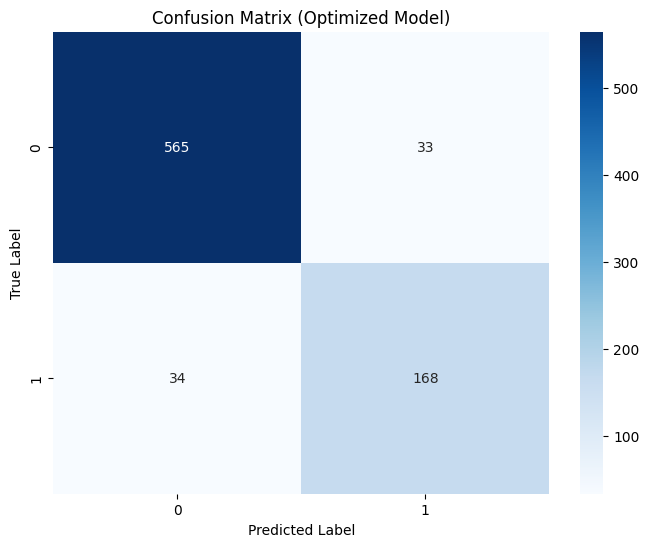

In [17]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Optimized Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

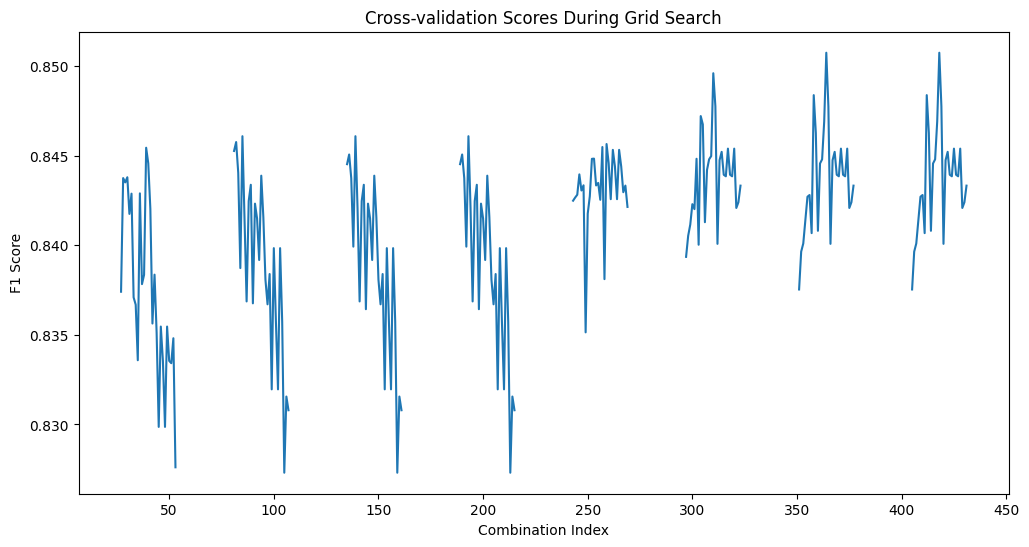

In [18]:
# 교차 검증 결과 시각화
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(12, 6))
plt.plot(cv_results['mean_test_score'])
plt.title('Cross-validation Scores During Grid Search')
plt.xlabel('Combination Index')
plt.ylabel('F1 Score')
plt.show()

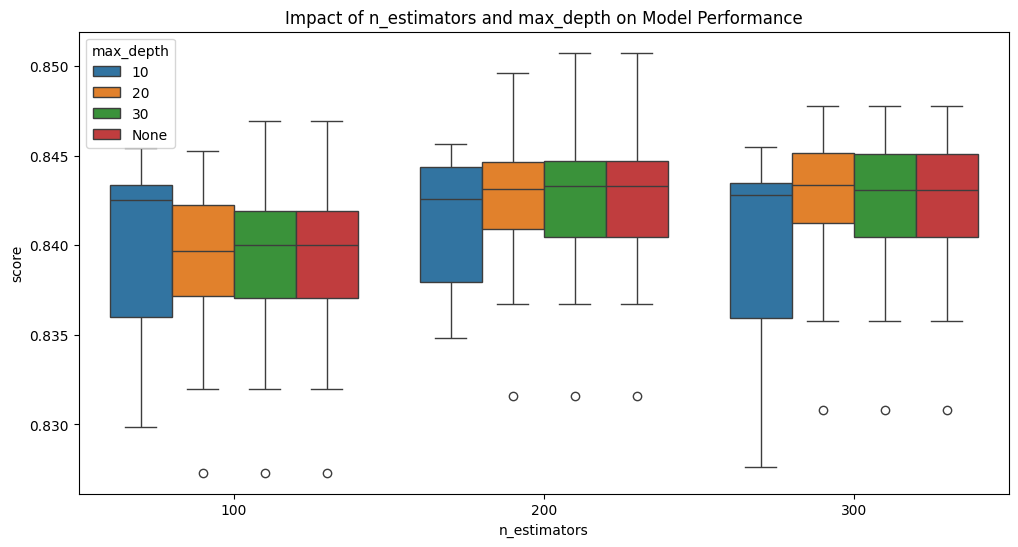

In [19]:
# 중요 하이퍼파라미터의 영향 분석
param_scores = pd.DataFrame({
    'n_estimators': cv_results['param_n_estimators'],
    'max_depth': cv_results['param_max_depth'].astype(str),
    'score': cv_results['mean_test_score']
})

plt.figure(figsize=(12, 6))
sns.boxplot(x='n_estimators', y='score', hue='max_depth', data=param_scores)
plt.title('Impact of n_estimators and max_depth on Model Performance')
plt.show()

----

## 결론

1. **모델 성능 분석**:
- 혼동 행렬(Confusion Matrix)을 보면:
    - 진짜 음성(TN): 565건 (이탈하지 않을 것으로 예측했고 실제로 이탈하지 않음)
    - 거짓 양성(FP): 33건 (이탈할 것으로 예측했으나 실제로 이탈하지 않음)
    - 거짓 음성(FN): 34건 (이탈하지 않을 것으로 예측했으나 실제로 이탈함)
    - 진짜 양성(TP): 168건 (이탈할 것으로 예측했고 실제로 이탈함)

- 모델 성능 지표:
    - 정확도 91.63%: 전체 예측 중 약 92%가 정확함
    - 정밀도 83.58%: 이탈 예측 중 실제 이탈한 비율
    - F1 점수 83.37%: 정밀도와 재현율의 조화평균으로 양호한 수준

2. **하이퍼파라미터 최적화 결과**:
- n_estimators(트리 개수)와 max_depth(트리 깊이)에 따른 성능 변화를 보여줌
- 200~300개의 트리와 다양한 깊이에서 비슷한 성능을 보임
- 성능 차이가 크지 않아 간단한 모델(낮은 깊이)로도 충분한 성능 달성 가능

3. **특성 중요도 분석**:
- Lifetime(고객 생애 기간): 30.7%로 가장 중요
- 현재 월 평균 수업 빈도: 16.6%로 두 번째로 중요
- 나이: 12.1%
- 전체 평균 수업 빈도: 10.8%
- 계약 종료까지 남은 기간: 9.5%

#### **최종 결론**:

- 모델의 예측 성능이 전반적으로 우수하며, 특히 91.63%의 높은 정확도를 보임
- 고객 이탈 예측에 있어 고객의 생애 기간과 수업 참여도가 가장 중요한 지표
- 하이퍼파라미터 튜닝 결과, 복잡한 모델이 아니어도 충분한 성능을 낼 수 있음
- 실제 활용을 위해서는 특히 고객의 생애 기간과 수업 참여도를 중점적으로 모니터링하고, 이탈 위험이 있는 고객들에 대한 선제적  관리가 필요